### Виконав: Овчар Антон, КА-64
# Лабораторна робота №8
## Крайова задача другого порядку
#### 1. Умова
Розв'язати крайову задачу 
$ \begin{cases}
Ay=f(x), \quad x_1<x<x_2 \\
a_1y(x), \qquad\quad x=x_1 \\
a_2y(x), \qquad\quad x=x_2
\end{cases}
\quad, де \quad Ay=y''+2y'-\frac{y}{x}, \quad a_1y=0.5y(0.9)+y'(0.9), \quad a_2y=y(1.2)$
#### 2.  Аналітичний розв'язок
Розв'язком задачі є функція: 

$\quad y=-1.798x^2-0.989x+0.448+(0.96x-2.505)^{-1}$

Диференціальні оператори мають вигляд:

$\quad Ay=- 5.394 x - 4.585 + \frac{1.843}{0.885 x^{3} + 6.925 x^{2} + 18.072 x + 15.719} - \frac{1.92}{0.922 x^{2} + 4.81 x + 6.275} - \frac{1}{0.96 x^{2} + 2.505 x} - \frac{0.448}{x}\\
\quad a_1y=-5.11\\
\quad a_2y=-3.054
$
#### 3. Чисельний розв'язок

In [32]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.5) # set default size of plots

##### Умова задачі

In [33]:
A = -1.798
B = -0.989
C = 0.448
D = 0.96
E = 2.505
x0 = 0.9
xn = 1.2

def y(x):
    return A*x**2 + B*x + C + (D*x + E)**(-1)

def dy(x):
    return 2*A*x + B - D*(D*x + E)**(-2)

def d2y(x):
    return 2*A + 2*D**2*(D*x + E)**(-3)

def p(x):
    return 2*x

def q(x):
    return -2

def f(x):
    return d2y(x) + p(x) * dy(x) + q(x) * y(x)

def a1(x=x0):
    return dy(x)

def alpha():
    return -1

def beta():
    return 0.4

def a2(x=xn):
    return alpha() * dy(x) + beta() * y(x)

def f1(x):
    return a1() * y(x)

def f2(x):
    return a2() * y(x)

##### Метод скінченних різниць

In [34]:
def get_matrix(x0, xn, n):
    h = (xn - x0) / n
    x = np.array([x0+i*h for i in range(n+1)])
    result = np.zeros((n+1, n+1))
    answer = np.zeros(n+1)
    
    for i in range(0, n+1):
        if i == 0:
            result[i][i] = -2 / h**2 + q(x[i])
            result[i][i+1] = 2 / h**2
            answer[i] = f(x[i]) + 2 * a1() * (1 / h - p(x[i]) / 2)
        elif i == n:
            result[i][i-1] = 2 / h**2
            result[i][i] = -2 / h**2 + q(x[i]) - 2 * beta() / alpha() * (1 / h + p(x[i]) / 2)
            answer[i] = f(x[i]) - 2 * a2() / alpha() * (1 / h + p(x[i]) / 2)
        else:
            result[i][i-1] = 1 / h**2 - p(x[i]) / 2 / h
            result[i][i] = -2 / h**2 + q(x[i])
            result[i][i+1] = 1 / h**2 + p(x[i]) / 2 / h
            answer[i] = f(x[i])
    
    return result, answer

##### Метод прогонки

In [35]:
def solve(matr_copy, vect_copy):
    matr = np.copy(matr_copy)
    vect = np.copy(vect_copy)
    n = matr.shape[0]
    a = [matr[i+1][i] for i in range(n-1)]
    a.insert(0, 0)
    b = [matr[i][i+1] for i in range(n-1)]
    b.append(0)
    c = [matr[i][i] for i in range(n)]
    f = vect
    
    x = [0 for i in range(n)]
    for i in range(1, n):
        m = a[i] / c[i-1]
        c[i] = c[i] - m * b[i-1]
        f[i] = f[i] - m * f[i-1]
    x[n-1] = f[n-1]/c[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (f[i] - b[i] * x[i+1]) / c[i]
        
    return x

##### Результати роботи програми

In [36]:
N = 500
matr, vect = get_matrix(x0, xn, N)
res = solve(matr, vect)
table = pd.DataFrame({
    'X': [x0+i*(xn-x0)/N for i in range(N+1)],
    'Y (method)': res,
    'Y (actual)': [y(x0+i*(xn-x0)/N) for i in range(N+1)],
    'Error': [np.fabs(res[i] - y(x0+i*(xn-x0)/N)) for i in range(N+1)]
})
display(table)

,X,Y (method),Y (actual),Error
0,0.9000,-1.601656,-1.601656,6.142781e-09
1,0.9006,-1.604243,-1.604243,6.141300e-09
2,0.9012,-1.606831,-1.606831,6.139824e-09
3,0.9018,-1.609420,-1.609420,6.138353e-09
4,0.9024,-1.612010,-1.612010,6.136887e-09
5,0.9030,-1.614602,-1.614602,6.135426e-09
6,0.9036,-1.617195,-1.617195,6.133969e-09
7,0.9042,-1.619789,-1.619789,6.132518e-09
8,0.9048,-1.622385,-1.622385,6.131072e-09
9,0.9054,-1.624982,-1.624982,6.129631e-09


##### Графік залежності помилки від розміру кроку дискретизації

In [37]:
steps = []
errors = []
for j in range(2, 1000):
    N = j
    matr, vect = get_matrix(x0, xn, N)
    res = solve(matr, vect)
    steps.append((xn-x0)/N)
    errors.append(max(np.fabs([res[i] - y(x0+i*(xn-x0)/N) for i in range(N+1)])))
table = pd.DataFrame(steps, errors)
display(table)

,0
3.794781e-04,0.150000
1.739021e-04,0.100000
9.889723e-05,0.075000
6.361859e-05,0.060000
4.430291e-05,0.050000
3.260397e-05,0.042857
2.498976e-05,0.037500
1.975984e-05,0.033333
1.601408e-05,0.030000
1.324005e-05,0.027273


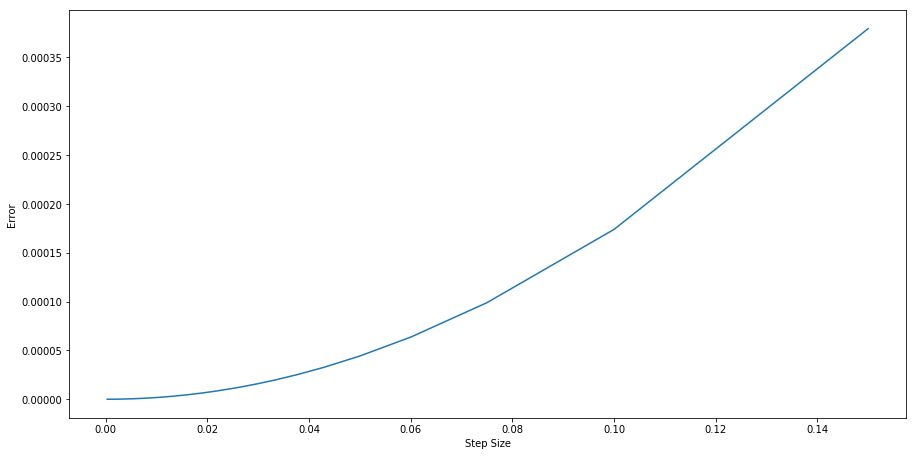

In [38]:
plt.plot(steps, errors)
plt.xlabel('Step Size')
plt.ylabel('Error')
plt.show()

#### Висновок
Проаналізувавши отримані результати, ми можемо зробити висновки про те, що метод скінченних різниць дає достатньо точний розв’язок диференціальної задачі, оскільки похибка значень нашої функції порівняно зі значеннями аналітичного розв’язку задачі у тих же точках є відносно невеликою. При зменшенні розміру кроку зменшується і похибка.